# Адаптивный круиз-контроль

## Постановка задачи

Оригинальная статья: http://ames.caltech.edu/ADHS15_Final.pdf

Рассматривается движение двух автомобилей по бесконечной прямой. Машины моделируются материальными точками. Та, которая едет впереди, называется ведущей (*leading car*, индекс $l$), а та, которая едет сзади, ведомой (*following car*, индекс $f$). Задача адаптивного круиз-контроля: управлять скоростью ведомой машины так, чтобы дистанция между автомобилями была в требуемых пределах, которые определяются из условий ниже.

Уравнение системы выглядит следующим образом:

 $\begin{bmatrix}
       \dot{v_l} \\
       \dot{v_f} \\
       \dot{D}  
     \end{bmatrix} = 
     \underbrace{\begin{bmatrix}
       a\\[0.3em]
       -\frac{F_r}{m}\\
       v_l - v_f
     \end{bmatrix}}_{\text{f(x)}} + 
     \underbrace{\begin{bmatrix}
       0\\[0.3em]
       g \Delta\theta\\
       0
     \end{bmatrix}}_{\text{$\Delta f(x)$}} +
     \underbrace{\begin{bmatrix}
       0\\[0.3em]
       \frac{1}{m}\\
       0
     \end{bmatrix}}_{\text{g(x)}}u$

### Аэродинамическое сопротивление машины и возмущения скорости

Определяется выражением:

$F_r = f_0 + f_1 v_f + f_2 {v_f}^{2}$, сама формула и значения коэффициентов получены эмпирическим путём из статьи ниже.

$f_0 = 0.1 \mathit{Newton}; f_1 = 5 \mathit{\frac{Newton \cdot s}{m}}; f_2 = 0.25 \mathit{\frac{Newton \cdot s^2}{m}}$

Источник данных: Ames, A.D., Grizzle, J.W., and Tabuada, P. (2014b). Control barrier function based quadratic programs with application to adaptive cruise control (https://docviewer.yandex.ru/?tm=1664479429&tld=ru&lang=en&name=CLF_QP_ACC_final.pdf&text=Ames%2C+A.D.%2C+Grizzle%2C+J.W.%2C+and+Tabuada%2C+P.+%282014b%29.+Control+barrier+function+based+quadratic+programs+with+application+to+adaptive+cruise+control.&url=http%3A//ames.caltech.edu/CLF_QP_ACC_final.pdf&lr=214&mime=pdf&l10n=ru&sign=73f09393352f4ab1c1778292a0191801&keyno=0).

Функцию возмущений определим таким образом (взято из статьи):

$\Delta \theta = 0.1 \cdot cos(\frac{2 \pi}{20} t)$.

### Ограничения

На движение ведомой машины накладывается два условия, которым оно должно удовлетворять. Первое из них, условно называемое **жёстким**, предписывает соблюдать безопасную дистанцию от ведущей машины, выражаемое следующим образом:

$\frac{D}{v_f} < {\tau}_{des}$, где ${\tau}_{des}$ — желаемое (*desired*) время реакции. В рассматриваемой работе принимаем ${\tau}_{des}$ = 1,8 секунд.

Определим функцию $h = D - {\tau}_{des}v_f$, тогда жёсткое условие можно переписать в виде $h \geq 0$. Время реакции ${\tau}_{des}$ — константа, равная 1,8 секундам.

Второе условие, называемое **мягким**, определяется так: при большой дистанции между двумя машинами ведомая машина набирает скорость вплоть до достижения *"желаемой скорости"* $v_d$, условной асиптоты на графике скорости. Математически это можно записать так: $v_d - v_f \rightarrow 0$. А это приводит нас к кандидату для контрольной функции Ляпунова *(control Lyapunov function, CFL)* для данной системы: 

$V = (v_d - v_f)^{2}$

В рассматриваемой работе "*желаемая скорость*" $v_d$ берётся равной 22 метрам в секунду.

### Решение системы

Перейдём к решению системы. Выполним замену: обозначим переменные системы как $x_1, x_2, x_3$. Подставим функции и константы выше. Получается фазовый вектор $\overrightarrow{x}$, перепишем систему с его помощью следующим образом:

$x(t_0) = \begin{cases}
       \dot{x_1} = a(t) \\
       \dot{x_2} = \frac{-f_0 - f_1 x_2 - f_2 {x_2}^{2}}{m} + 0.1g \cos(\frac{\pi}{10}t) + \frac{u(t)}{m}\\
       \dot{x_3} = x_1 - x_2
     \end{cases} $
     

### Начальные и конечные условия

Начальные условия по задаче: в момент времени $t = 0с$: $v_l(0) = 20м/с$, $v_f(0) = 18м/с$, $D(0) = 80м/с$:

\begin{cases}
    x_1(0) = 20\\
    x_2(0) = 18\\
    x_3(0) = 80
  \end{cases}

Константы:
$$\kappa = 5$$
$$\Delta\theta = 0.1\cos(2\pi t/20)$$

### Динамическая система
$$[v_l';v_f';D']^T = [a_1;-F_r/m;v_l-v_f]^T-[0;g\Delta\theta;0]^T+u[0;1/m;0]^T$$
$$D-\tau v_f \ge ; \tau = 1.8$$
$$u^{*}(x) = \arg\min \frac{1}{2} u^THu+F^Tu$$

где: 
$$A_{clf}u\le b_{clf}$$
$$A_{zcbf}u\le b_{zcbf}$$
$$H = 2 \begin{bmatrix}
\frac{1}{m^2} & 0 \\
0 & p_{sc} 
\end{bmatrix}$$
$$F = -2 \begin{bmatrix}
\frac{F_r}{m^2} \\
0  
\end{bmatrix}$$
$$A_{clf} = [\frac{2(v_f-v_d)}{m} , -1]$$
$$b_{clf} = F_r\frac{2(v_f-v_d)}{m}-(v_f-v_d)^2$$
$$A_{zcbf} = [\frac{-1.8}{m} , 0]$$
$$b_{zcbf} = F_r\frac{-1.8}{m}-(v_l-v_f)+\alpha(h(x))$$

Всё выше взято из материалов статьи.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
from scipy.integrate import odeint

In [2]:
# Задание констант, используемых в задаче. Часть взята из оригинальной статьи, часть — из статьи Ames 2014b.

m = 1650                                     #Масса управляемой машины
g = 9.81                                     #Ускорение свободного падения
theta = lambda t: 0.1*np.cos(np.pi*t/10)     #Возмущения/флуктуации скорости, вызванные наклоном и неровностями дороги
v_d = 22                                     #Желаемая скорость                                   
tau = 1.8                                    #Время реакции
kappa = 5
psc = 1E-5

T = 150                                    #Интервал времени
N = 1000                                   #Количество шагов расчёта

In [3]:
#Задание нужного математического аппарата: матрицы и функции

h = lambda D, v_f: D - tau*v_f
a_l = lambda v_l: 0.1*(16.5-v_l)

F_r = lambda v: 0.1 + 5 * v + 0.25 * v * v
aclf = lambda v: np.array([2 * (v - v_d) / m, -1])
bclf = lambda v: 2 * (v - v_d) / m * F_r(v) - (v - v_d)**2
azcbf = np.array([-1.8 / m, 0])
bzcbf = lambda X: -1.8 / m * F_r(X[1]) - X[0] + X[1] + kappa * h(X[2], X[1])
H = 2 * np.array([[1 / (m*m), 0], [0, psc]])
F = lambda v: -2 * np.array([F_r(v) / (m*m), 0]).transpose()

In [4]:
# Функция, которую нам надо оптимизировать (отыскать минимум)

def target(xy):
    global F0
    u = xy[0]
    delta = xy[1]
    u = np.array([u, delta])
    t = 1/2 * u.transpose().dot(H).dot(u)
    return 1/2 * u.transpose().dot(H).dot(u) + (F0.transpose()).dot(u)

In [5]:
# Воспользуемся методом optimize.minimize для поиска минимума при заданных граничных условиях

def find_u_star(X):
    v_l = X[0]
    v_f = X[1]
    d = X[2]

    global F0
    F0 = F(v_f)
    aclf0 = aclf(v_f)
    bclf0 = bclf(v_f)
    bzcbf0 = bzcbf(X)
        
    c1 = ({'type':'ineq', 'fun': lambda xy: -aclf0.dot(np.array([xy[0], xy[1]])) + bclf0})
    c2 = ({'type':'ineq', 'fun': lambda xy: -azcbf.dot(np.array([xy[0], xy[1]])) + bzcbf0})
    cons = [c1, c2]
    init = [0, 0]
        
    res = minimize(target, init, constraints=cons)
    u_star = res.x[1]
    
    return u_star

In [6]:
# Функция управления найдена. Подставляем её в нашу систему ДУ и решаем её методом odeint

def equations(x, t):
    v_l = x[0]
    v_f = x[1]
    d = x[2]
    u = find_u_star(x)
    
    dv_l = a_l(v_l)
    dv_f = - F_r(v_f)/m + g * theta(t) + (1/m) * u
    dd = v_l - v_f
    
    return [dv_l, dv_f, dd]

In [7]:
X_initial = np.array([20, 18, 80])
t = np.linspace(0, T, N)
x = odeint(equations, X_initial, t)

v_l = x[:, 0]
v_f = x[:, 1]
d = x[:, 2]

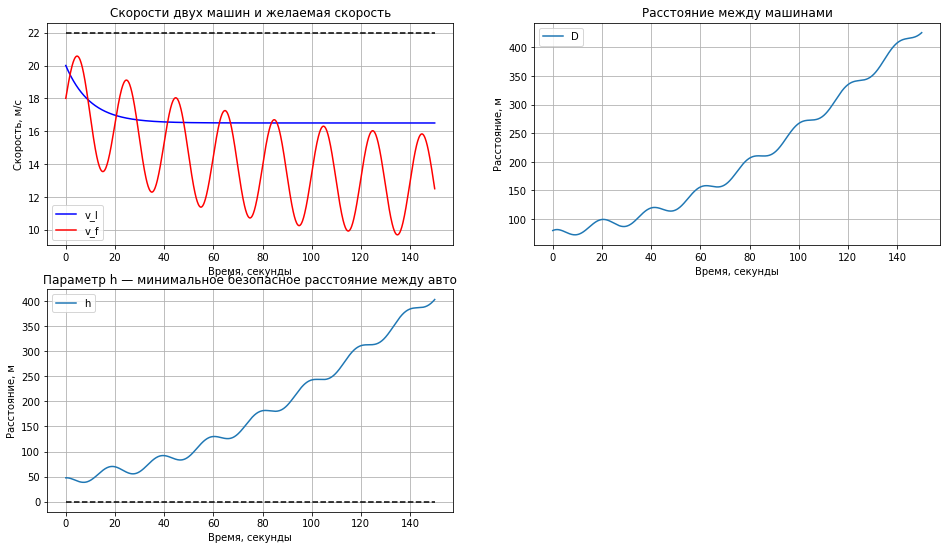

In [8]:
# Построение графиков
t = np.linspace(0, T, N);
v_desired = v_d * np.ones((1, N)).reshape(-1, 1)
h_desired = np.zeros((1, N)).reshape(-1, 1)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(2, 2, 1)
ax.plot(t, v_l, label = 'v_l', color = 'blue')
ax.plot(t, v_f, label = 'v_f', color = 'red')
ax.plot(t, v_desired, linestyle = '--', color = 'black')
ax.set_xlabel('Время, секунды')
ax.set_ylabel('Скорость, м/с')
ax.set_title('Скорости двух машин и желаемая скорость')
ax.grid()
ax.legend()

ax = fig.add_subplot(2, 2, 2)
ax.plot(t, d, label = 'D')
ax.set_xlabel('Время, секунды')
ax.set_ylabel('Расстояние, м')
ax.set_title('Расстояние между машинами')
ax.grid()
ax.legend()

ax = fig.add_subplot(2, 2, 3)
ax.plot(t, h(d, v_f), label = 'h')
ax.plot(t, h_desired, linestyle = '--', color = 'black')
ax.set_xlabel('Время, секунды')
ax.set_ylabel('Расстояние, м')
ax.set_title('Параметр h — минимальное безопасное расстояние между авто')
ax.grid()
ax.legend()

#ax = fig.add_subplot(2, 2, 4)
#ax.plot(t, u, label = 'u')
#ax.set_xlabel('Время, секунды')
#ax.set_ylabel('Управление')
#ax.set_title('Управление')
#ax.grid()
#ax.legend()